In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
plt.style.use("ggplot")

In [2]:
'''
Business Question:

1. Which month has the best sales? How much does it earn?
2. What city has the best sales?
3. What time should we display advertisement to maximize the likelihood of customer's buying our product?
4. What products are most often sold together?
5. What kind of product sold the most? Why is it?

'''

"\nBusiness Question:\n\n1. Which month has the best sales? How much does it earn?\n2. What city has the best sales?\n3. What time should we display advertisement to maximize the likelihood of customer's buying our product?\n4. What products are most often sold together?\n5. What kind of product sold the most? Why is it?\n\n"

In [3]:
m1 = pd.read_csv('sales2019_1.csv')
m2 = pd.read_csv('sales2019_2.csv')
m3 = pd.read_csv('sales2019_3.csv')
m4 = pd.read_csv('sales2019_4.csv')
m5 = pd.read_csv('sales2019_5.csv')
m6 = pd.read_csv('sales2019_6.csv')
m7 = pd.read_csv('sales2019_7.csv')
m8 = pd.read_csv('sales2019_8.csv')
m9 = pd.read_csv('sales2019_9.csv')
m10 = pd.read_csv('sales2019_10.csv')
m11 = pd.read_csv('sales2019_11.csv')
m12 = pd.read_csv('sales2019_12.csv')

frames = [m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12]
df = pd.concat(frames)

df.to_csv('annualSales2019.csv')

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
### 1. Which month has the best sales? How much does it earn?
'''
Since the company only interested which month has the best sale, therefore, I need to add a column 'Month' from 'Order Date' column.
'''

df['Month'] = df['Order Date'].str.slice(0,2)
# 0: first character of string  
# 2: stop index


print(df.head())
print(':/')
print(df.dtypes)

  Order ID                   Product Quantity Ordered Price Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       Order Date                       Purchase Address Month  
0  01/22/19 21:25        944 Walnut St, Boston, MA 02215    01  
1  01/28/19 14:15       185 Maple St, Portland, OR 97035    01  
2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016    01  
3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001    01  
4  01/25/19 11:59          387 10th St, Austin, TX 73301    01  
:/
Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: ob

In [6]:
# 1.1 - Check for consistent value in 'Month' column
print(set(df['Month']))
# get rid of 'nan'
df = df.dropna(how='all')
df.head()

# get rid of 'Or'
df = df[df['Month'] != 'Or']
df.head()

{'10', '06', '01', '05', '08', '11', '09', nan, '02', '03', 'Or', '12', '04', '07'}


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32
The most sales revenue is:  4613443.5


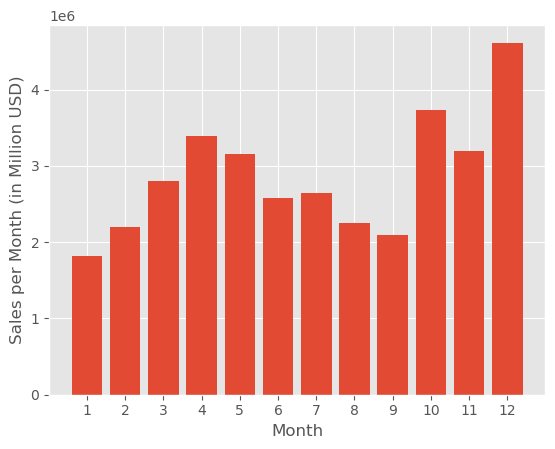

Conclusion: The month that has most sales revenue is December with 4613443.5 dollar


In [7]:
# 1.2 - Reporting

'''
1. Which month has the best sales? How much does it earn?
'''

# Data type for both columns 'Qty Ordered' and 'Price Each' are object. I need to convert data types from object to integer & float for calculation
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')

df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# For convinience purposes, I decided to moved 'Sales' column next to 'Price Each' column.
moving = df.pop('Sales')
df.insert(4, 'Sales', moving)

# Group total sales by month to answer business question
sales_revenue = df.groupby('Month').sum()['Sales']
print(sales_revenue)
print('The most sales revenue is: ', sales_revenue.max())

# Plot a bar chart
months = range(1,13)
plt.bar(x=months, height=sales_revenue)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales per Month (in Million USD)')
plt.show()


print('Conclusion: The month that has most sales revenue is December with', sales_revenue.max(), 'dollar')

City
Atlanta          2795498.50
Austin           1819581.75
Boston           3661642.00
Dallas           2767975.50
Los Angeles      5452571.00
New York City    4664317.50
Portland         2320490.50
San Francisco    8262204.00
Seattle          2747755.50
Name: Sales, dtype: float32


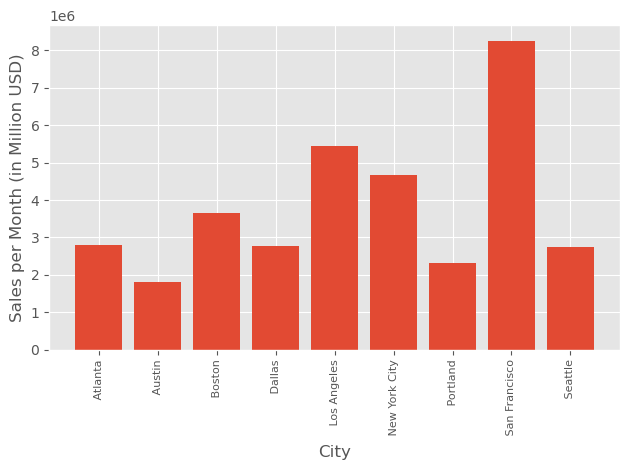

Conclusion: The city that have most sales is San Francisco with  8262204.0 USD.


In [8]:
### 2. What city has the best sales?

#2.1 - Split the city from "Purchase Address" column
address_to_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_to_city)

sales_rev_city = df.groupby('City').sum()['Sales']
print(sales_rev_city)
sales_rev_city.max()

cities = []
for city, sales in sales_rev_city.items():
    cities.append(city)


#2.2 - Plot chart
plt.bar(x=cities, height=sales_rev_city)
plt.xticks(cities, rotation = 90, size =8)
plt.xlabel('City')
plt.ylabel('Sales per Month (in Million USD)')
plt.tight_layout()
plt.show()

print('Conclusion: The city that have most sales is San Francisco with ', sales_rev_city.max(), 'USD.' )

/var/folders/0y/4rkjz_214b7cqmfb9xs9h07c0000gn/T/ipykernel_52454/347426410.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


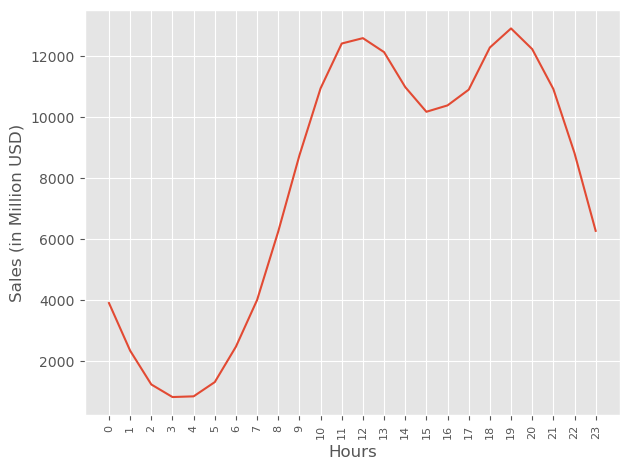

Conclusion:
As a result, we should display our ads during lunch hours from 11:00 PM to 12:00 PM, as well as 6:00 PM to 7:00 PM.
Because those two range of hours are peak time, therefore the customer likely to place order.


In [9]:
### 3. What time should we display advertisement to maximize the likelihood of customer's buying our product?

#3.1 - Convert time from "Order Date" to "datetime"
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Hours'] = df['Order Date'].dt.hour

sales_rev_hours = df.groupby('Hours')['Sales'].count()
hours = [hour for hour, sales in sales_rev_hours.items()]

plt.plot(hours, sales_rev_hours)
plt.xticks(hours, rotation = 90, size =8)
plt.xlabel('Hours')
plt.ylabel('Sales (in Million USD)')
plt.tight_layout()
plt.show()


print('Conclusion:')
print('As a result, we should display our ads during lunch hours from 11:00 PM to 12:00 PM, as well as 6:00 PM to 7:00 PM.')
print('Because those two range of hours are peak time, therefore the customer likely to place order.')

In [10]:
### 4. What products are most often sold together?

#4.1 - My thought to answer this question is that there are three potention signs, same order date/time which delivery to the same house address
#    - The same "Order ID"
#print(df)

df_dup = df[df['Order ID'].duplicated(keep=False)].copy()
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df_dup = df_dup.drop_duplicates(subset=['Order ID'])
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone, Wired Headphones"
153,141384,Google Phone,1,600.00,600.00,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",01,Boston,0,"Google Phone, USB-C Charging Cable"
220,141450,Google Phone,1,600.00,600.00,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",01,San Francisco,11,"Google Phone, Bose SoundSport Headphones"


In [11]:
# 4.2 - Create a new df include 'Order ID' and 'All Products'. Then view 10 most selling product.
df_dup[['Order ID', 'All Products']].drop_duplicates
print(df_dup['All Products'].value_counts().head(10))

print()

# 4.3 - Report to question "What products are most often sold together?"
print('Conclusion: In order to maximize our revenue, and reduce the number of items left over in inventory, we should combine and sell most selling product with least selling product at a discount price.')

All Products
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: count, dtype: int64

Conclusion: In order to maximize our revenue, and reduce the number of items left over in inventory, we should combine and sell most selling product with least selling product at a discount price.


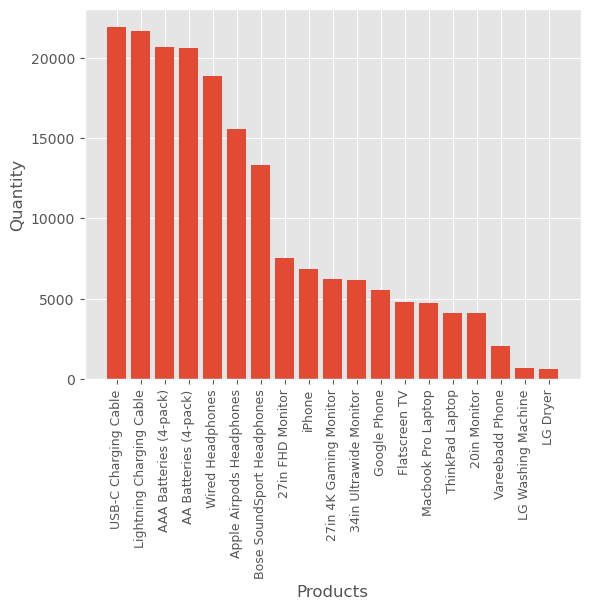

Conclusion: This could be the lower price, quality of product.


In [24]:
### 5 - What kind of product sold the most? Why is it?

all_products = df['Product'].value_counts().to_dict()
product_ls = [product for product, quant in all_products.items()]
quantities = [quant for product, quant in all_products.items()]

# 5.1 - Plot chart for a better view.
plt.bar(product_ls, quantities)
plt.xticks(product_ls, rotation=90, size=9)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()


print('Conclusion: This could be the lower price, quality of product.')